In [38]:
import pandas as pd 
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

import datetime 

from mpl_finance import candlestick_ohlc

In [6]:
file_path = ('data/F.csv')
f_df = pd.read_csv(file_path)

f_df = f_df.set_index('Date')

f_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-26,11.80,11.930000,11.760000,11.880000,9.677618,36219900
2016-10-27,11.81,11.830000,11.600000,11.740000,9.563572,48402000
2016-10-28,11.74,11.850000,11.630000,11.720000,9.547280,37142400
2016-10-31,11.75,11.810000,11.690000,11.740000,9.563572,31898400
2016-11-01,11.78,11.840000,11.500000,11.610000,9.457670,35613600
...,...,...,...,...,...,...
2021-10-19,15.60,15.690000,15.370000,15.420000,15.420000,44668300
2021-10-20,15.43,16.160000,15.370000,16.040001,16.040001,105213700
2021-10-21,16.16,16.700001,16.129999,16.549999,16.549999,95855000


In [8]:
f_df.index = pd.to_datetime(f_df.index)
f_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-26,11.80,11.930000,11.760000,11.880000,9.677618,36219900
2016-10-27,11.81,11.830000,11.600000,11.740000,9.563572,48402000
2016-10-28,11.74,11.850000,11.630000,11.720000,9.547280,37142400
2016-10-31,11.75,11.810000,11.690000,11.740000,9.563572,31898400
2016-11-01,11.78,11.840000,11.500000,11.610000,9.457670,35613600
...,...,...,...,...,...,...
2021-10-19,15.60,15.690000,15.370000,15.420000,15.420000,44668300
2021-10-20,15.43,16.160000,15.370000,16.040001,16.040001,105213700
2021-10-21,16.16,16.700001,16.129999,16.549999,16.549999,95855000


In [15]:
f_df.dtypes


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

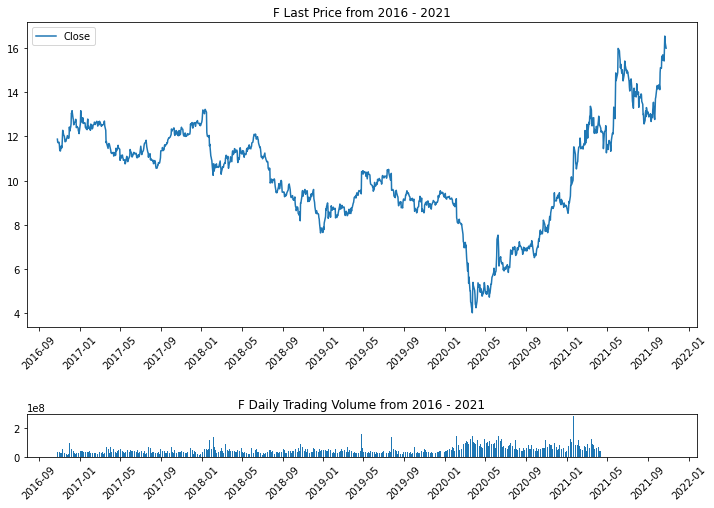

In [20]:
# Top plot consisting of daily closing prices 

top = plt.subplot2grid((4,4), (0,0), rowspan = 3, colspan = 4)
top.plot(f_df.index, f_df["Close"], label = "Close")

plt.title("F Last Price from 2016 - 2021")
plt.legend(loc = 2)
plt.xticks(rotation = 45)

top.xaxis.set_major_locator(mdates.MonthLocator(interval = 4))

formatter = mdates.DateFormatter("%Y-%m")
top.xaxis.set_major_formatter(formatter)



#Bottom plot consisting of daily trading volume 
bottom = plt.subplot2grid((4,4), (3,0), rowspan = 1, colspan = 4)
bottom.bar(f_df.index, f_df["Volume"])

plt.title("F Daily Trading Volume from 2016 - 2021")
plt.xticks(rotation = 45)


bottom.xaxis.set_major_locator(mdates.MonthLocator(interval = 4))

bottom.xaxis.set_major_formatter(formatter)


plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace = 2.0)

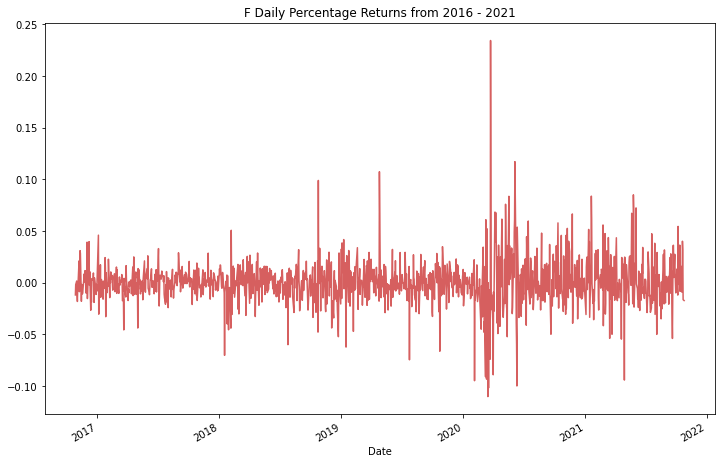

In [22]:
daily_changes = f_df["Close"].pct_change(periods = 1)
daily_changes.plot(figsize = (12, 8), color = '#d65f5f', label = "Close")

plt.title("F Daily Percentage Returns from 2016 - 2021");

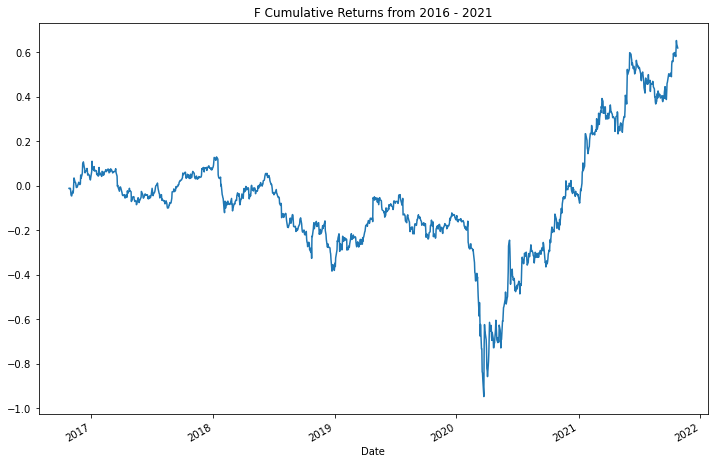

In [24]:
df_cumsum = daily_changes.cumsum()

df_cumsum.plot(figsize = (12, 8))

plt.title("F Cumulative Returns from 2016 - 2021");

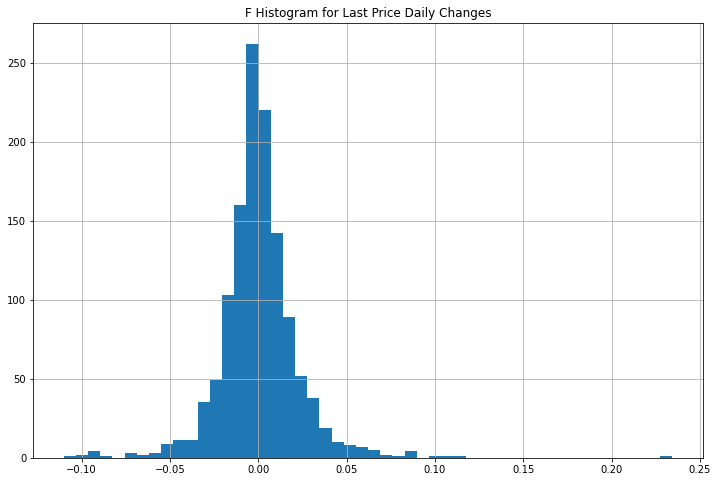

In [26]:
daily_changes.hist(bins = 50, figsize = (12, 8))

plt.title("F Histogram for Last Price Daily Changes");

In [27]:
daily_changes.describe()

count    1257.000000
mean        0.000492
std         0.022710
min        -0.110124
25%        -0.009967
50%         0.000000
75%         0.009989
max         0.234414
Name: Close, dtype: float64

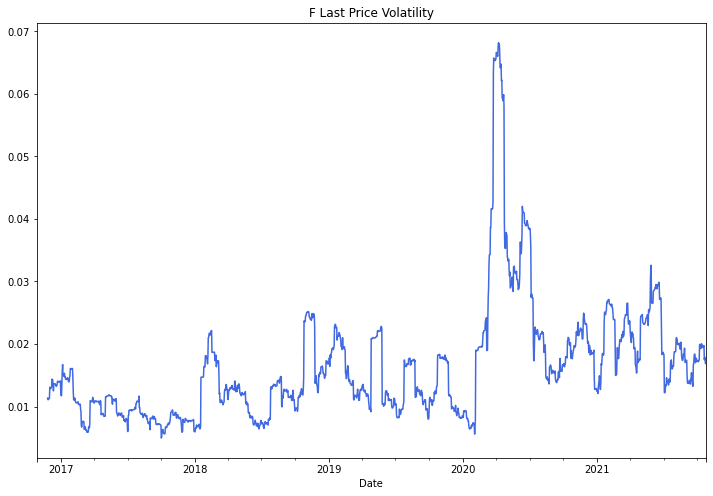

In [30]:
df_filled = f_df["Close"].asfreq("D", method = "ffill")
df_returns = df_filled.pct_change()
df_stf = df_returns.rolling(window = 30).std()

df_stf.plot(figsize = (12, 8), color = "royalblue")

plt.title('F Last Price Volatility');

In [33]:
df_subset = f_df[f_df.index > '2021-01-01']
df_subset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,8.81,8.840000,8.430000,8.520000,8.520000,85043100
2021-01-05,8.47,8.720000,8.460000,8.650000,8.650000,70127800
2021-01-06,8.79,8.940000,8.680000,8.840000,8.840000,72590200
2021-01-07,8.94,9.080000,8.880000,9.060000,9.060000,77117100
2021-01-08,9.10,9.140000,8.890000,9.000000,9.000000,59162200
...,...,...,...,...,...,...
2021-10-19,15.60,15.690000,15.370000,15.420000,15.420000,44668300
2021-10-20,15.43,16.160000,15.370000,16.040001,16.040001,105213700
2021-10-21,16.16,16.700001,16.129999,16.549999,16.549999,95855000


/Users/abdullahberakucuk/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


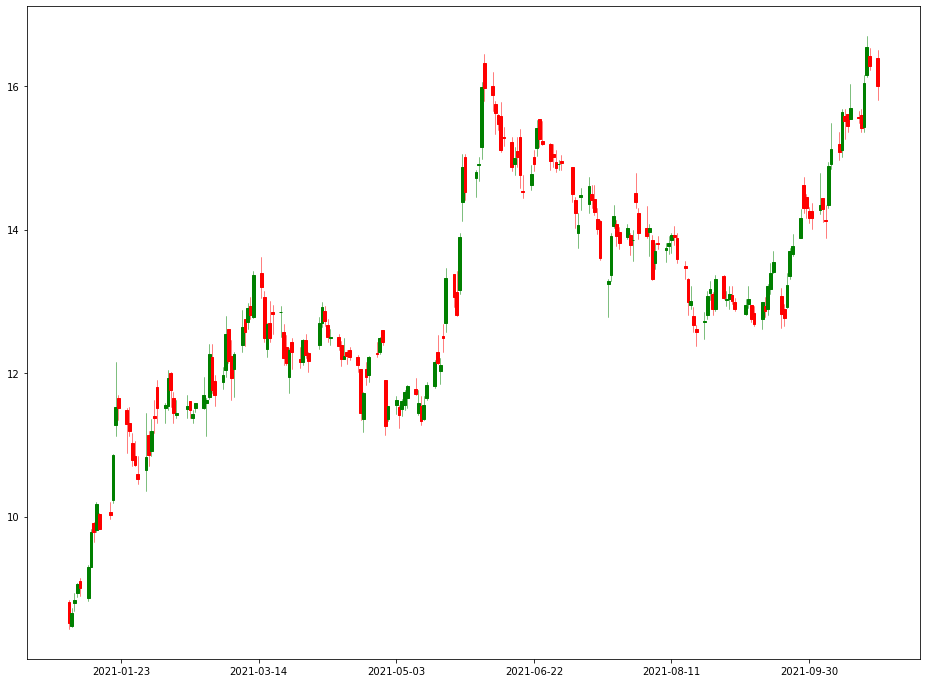

In [42]:
# OHLC - Open/ High/ Low/ Close
df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Close']]

figure, ax = plt.subplots(figsize = (16, 12))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax, 
                df_ohlc.values, 
                width = 1,
                colorup = 'green',
                colordown = 'red')

plt.show()